**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.model_selection import train_test_split

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features
y = heart_disease.data.targets

X.head() # First check that all data is roughly ok

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [2]:
X.nunique() # Check for future one-hot-encoding of categorical

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
dtype: int64

In [3]:
X.isna().any() # See if something's missing

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
dtype: bool

In [4]:
X = X.dropna() # Drop missing stuff
y = y.iloc[X.index]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42) # Split!

# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [6]:
X_train.loc[:, ["cp", "restecg", "slope", "thal"]] = pd.get_dummies(X_train.loc[:, ["cp", "restecg", "slope", "thal"]])
X_test.loc[:, ["cp", "restecg", "slope", "thal"]] = pd.get_dummies(X_test.loc[:, ["cp", "restecg", "slope", "thal"]])

#Since we are using an xgboost model there's no need to standardize or normalize!

# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [11]:
from sklearn.model_selection import RandomizedSearchCV # I make the search slightly faster this way!
from sklearn.metrics import f1_score, accuracy_score
import xgboost as xgb

base_model = xgb.XGBClassifier(random_state=42)

base_model.fit(X_train, y_train)

preds = base_model.predict(X_test)

print(f1_score(y_test, preds, average="weighted"))
print(accuracy_score(y_test, preds))

0.5924025974025974
0.5833333333333334


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [8]:
from sklearn.model_selection import RandomizedSearchCV # I make the search slightly faster this way!

model = xgb.XGBClassifier(random_state=42)
params = {"n_estimators":[10, 20, 30, 50, 100], "max_depth":[5, 10, 15]}
rand_search = RandomizedSearchCV(model, params, scoring="f1_weighted", cv=5, random_state=42)

rand_search.fit(X_train, y_train)
best_model = rand_search.best_estimator_

preds = best_model.predict(X_test)

print(f1_score(y_test, preds, average="weighted"))
print(accuracy_score(y_test, preds))

0.6002380952380953
0.6


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

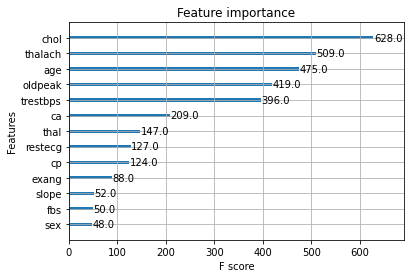

In [12]:
xgb.plot_importance(base_model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

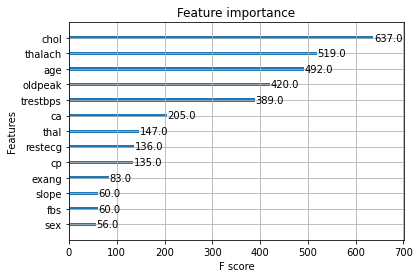

In [13]:
xgb.plot_importance(best_model)

Interestingly enough, the feature importance is almost equivalent between the two models, but the better one gives more or less importance to some features, by a little.

# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

In [10]:
# insert code here